In [44]:
import matplotlib.pyplot as plt
import requests
import ssl
import json
import pandas

In [3]:

 
# API 地址的一部分
addr = "https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo="
 
# 存储大乐透 API 的接口地址
SuperLotto = []
 
# 拼接 URL,获取 50页数据， page 返回一个列表，列表的值是 [1,2,3,4,……,49,50]
page = [i for i in range(1,51)]  # page=[1,2,3,4,……,49,50]
for i in page: # i 循环从列表 page中取数据 ，因为列表的下标是从 0 开始 ， i = 1
    url = addr + str(page[i-1])  # 所以 str(page[i-1]) => page[0]  => 1
    SuperLotto.append(url) # 得出 url 就是第一页的数据，依次类推， 50页数据
 
# 构造请求信息，我们将以此身份信息去访问该网站
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36",
    "Host": "webapi.sporttery.cn",
    "Connection": "keep-alive",
}
# 打印 URL ，看看是否符合预期
print(SuperLotto)
# 因为是 https 协议，所以需要设置此 ssl 
gcontext = ssl.SSLContext(ssl.PROTOCOL_TLSv1)
 
lotteryUnsortDrawresults, lotterySaleEndtimes = [], []
# 循环处理每一条 URL 
for url in SuperLotto:
    #  发送get 请求，将请求返回保存在 response 对象
    response_obj = requests.get(url,headers = headers)
    # 循环处理每一个 请求
    response = response_obj.text
    # print(response_obj.status_code)
    response_json = json.loads(response)
    page_len = len(response_json['value']["list"])  # page_len = 30

    
    for i in range(page_len):       # i = 0,1,2,……，29
        # lotteryDrawNum = response_json['value']["list"][i]["lotteryDrawNum"]
        # lotterySaleEndtime = response_json['value']["list"][i]["lotterySaleEndtime"].split(" ")[0]   
        # lotterySaleEndtimes.append(lotterySaleEndtime)  
        lotteryUnsortDrawresult = response_json['value']["list"][i]["lotteryUnsortDrawresult"]
        lotteryUnsortDrawresults.append(lotteryUnsortDrawresult)
        # stakeCount = str(response_json['value']["list"][i]["prizeLevelList"][0]["stakeCount"])
 
###########################################################################
 
# 先执行上面的代码，我们发现返回的是 200
 
 


['https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo=1', 'https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo=2', 'https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo=3', 'https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo=4', 'https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo=5', 'https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo=6', 'https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVerify=1&pageNo=7', 'https://webapi.sporttery.cn/gateway/lottery/getHistoryPageListV1.qry?gameNo=85&provinceId=0&pageSize=30&isVer

In [34]:
## 数据分析
import pandas as pd

print(len(lotteryUnsortDrawresults))

# 分解数字
blue_nums = []
red_nums = []
for num_list in lotteryUnsortDrawresults:
    tmp = num_list.split()
    #print(tmp, tmp[5:])
    if tmp == ['current']:
        continue
    blue_nums += list(map(int, tmp[:5])) #[int(i) for i in tmp[:5]]
    red_nums += list(map(int, tmp[5:])) #[int(i) for i in tmp[5:]]




1500


In [95]:
# 单个数字频率分析

lotteryUnsortDrawresults

['21 16 25 08 14 03 12',
 '32 09 02 06 31 07 03',
 '29 04 31 18 34 06 09',
 '30 08 24 22 06 01 08',
 '21 32 11 07 30 07 05',
 '07 24 19 02 30 12 09',
 '23 13 28 25 09 07 04',
 '29 19 35 32 22 05 08',
 '05 06 24 19 01 11 05',
 '24 13 34 22 33 02 01',
 '15 06 08 12 13 01 06',
 '31 34 19 25 30 07 09',
 '11 01 20 14 03 02 11',
 '33 08 11 02 30 05 08',
 '33 11 29 19 03 03 12',
 '29 08 09 14 25 04 06',
 '03 22 26 17 28 07 12',
 '07 32 16 25 13 11 09',
 '24 12 25 13 10 11 12',
 '13 21 32 28 25 02 10',
 '07 28 10 31 13 05 04',
 '15 06 07 08 02 07 10',
 '27 17 02 04 20 01 08',
 '16 27 23 21 02 08 01',
 '26 13 05 35 08 09 05',
 '05 18 22 30 04 12 05',
 '24 34 26 02 30 07 06',
 '10 04 18 32 27 10 12',
 '24 16 08 20 06 07 08',
 '26 13 22 01 31 10 02',
 '25 14 29 23 07 11 02',
 '15 09 07 24 10 04 12',
 '25 06 04 10 11 09 07',
 '30 05 28 18 06 02 07',
 '16 25 08 07 05 03 11',
 '35 20 06 12 11 05 12',
 '27 25 35 34 07 09 11',
 '34 01 03 30 29 12 04',
 '15 12 09 10 23 06 03',
 '30 13 02 24 27 01 06',


In [99]:
s = "29 01 20 03 30 29 07 11"
s in lotteryUnsortDrawresults

False

In [38]:
# 构建df
blue_data = {'blue_nums': map(int, blue_nums)}
red_data = {'red_nums': map(int, red_nums)}

blue_df = pd.DataFrame(blue_data)
red_df = pd.DataFrame(red_data)

In [42]:

# 
# fre_dict = blue_df.value_counts
blue_df.to_csv('lt_blue_nums.csv', encoding= 'utf-8')
red_df.to_csv('lt_red_nums.csv', encoding= 'utf-8')

In [96]:
t = red_df.value_counts().to_dict()

sorted(t.items(), key=lambda item:item[1], reverse=True)


[((7,), 281),
 ((12,), 271),
 ((11,), 270),
 ((5,), 264),
 ((4,), 255),
 ((2,), 252),
 ((3,), 250),
 ((10,), 241),
 ((9,), 241),
 ((6,), 236),
 ((1,), 220),
 ((8,), 217)]

In [90]:
def nums_fre(df):
    fre_dict = df.value_counts().to_dict()
    fre_dict = sorted(fre_dict.items(), key=lambda item:item[0])
    
    data =  [i[1] for i in fre_dict]
    labels = [i[0][0] for i in fre_dict]
    plt.figure(figsize=(16, 16))
    plt.bar(range(len(data)), data, tick_label=labels)
    plt.show()

In [ ]:

nums_fre(blue_df)
nums_fre(red_df)

In [72]:
## 多变量自定义函数拟合
from math import log, exp

import numpy
import pandas as pd
from numpy import double
import numpy as np
import matplotlib.pyplot as plt

B = np.array([[1,1,1,1,1,1],[1,2,3,4,2,6],[1,2,3,4,5,3],[1,2,3,4,5,1],[1,2,3,4,5,2],[1,2,3,4,5,1]])
b = np.array([1,2,3,4,5,4])
# x = np.linalg.solve(B,b)
# b = B x
x = np.linalg.lstsq(B, b)
print(x)


(array([ 0.04848485,  0.21818182,  0.38787879,  0.55757576,  0.15151515,
       -0.36363636]), array([], dtype=float64), 4, array([1.69162533e+01, 4.86658501e+00, 8.85526972e-01, 6.10382829e-01,
       3.60948433e-16, 1.04978688e-16]))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


[1.0000000000000022, 1.9999999999999973, 3.5454545454545436, 4.272727272727272, 3.9090909090909074, 4.272727272727272]


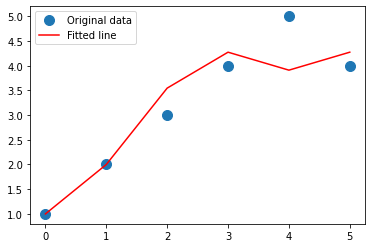

In [73]:
price = [i for i in range(len(B))]

predic = [np.dot(x[0], B[i]) for i in range(len(B))]
# print(predic)
true = b

import matplotlib.pyplot as plt
plt.plot(price, true, 'o', label='Original data', markersize=10)
plt.plot(price, predic, 'r', label='Fitted line')
plt.legend()
plt.show()

In [40]:
B = np.mat("1 -2 1")
b = np.array([[8],[1],[2]])

print("B", B)
print("b", b)


np.dot(B , b)

B [[ 1 -2  1]]
b [[8]
 [1]
 [2]]


matrix([[8]])

[-1.40407374  4.70942013]


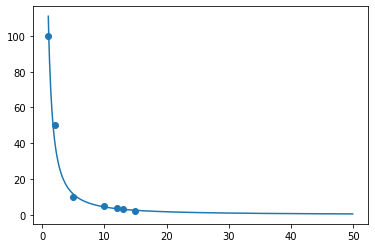

In [12]:
## 多变量拟合量价关系 np.linalg
from math import log

import numpy
import pandas as pd
from numpy import double
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv('test.csv')
# prices = df.loc[:, 'List Price ($/Case)'].values.tolist()
# volumes = df.loc[:, 'Volume - Actual (Cases)'].values.tolist()

prices = [1, 2, 5, 10, 12, 13, 15]
volumes = [100, 50, 10, 5, 4, 3, 2]

# loglog拟合公式
def price_func(X, a0, a1, a2, b0, b1, b2, c):  # 定义多变量拟合函数, X 是向量
    # p0, p1, p2, p3 = p  # 拟合函数的参数

    y = a0 * X[0] + a1 * X[1] + a2 * X[2] + b0 * log(X[3]) + b1 * log(X[4]) + b2 * log(X[5]) + c
    return exp(y)

log_volumes = [log(x) for x in volumes.copy()]
fit = np.polyfit( np.log(prices), log_volumes, 1)

plt.figure(1)
# 只显示 x = 45 to 60
x = np.arange(1, 50, 0.1)
print(fit)
y = np.exp(fit[1] + fit[0] * np.log(x))

plt.plot(x, y)
plt.scatter(prices, volumes)
plt.show()
plt.close()



In [9]:
B

matrix([[ 1, -2,  1],
        [ 0,  2, -8],
        [-4,  5,  9]])

In [11]:
x = np.linalg.solve(B,b)
print (np.dot(B , x))

[[ 0.  8. -9.]]


In [77]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 生成随机的数据
B = np.array([1, 2, 3, 4, 5, 6])  # 品牌每周平均流量
T = np.array([10, 20, 30, 40, 50, 60])  # 品类每周平均流量
P1 = np.array([100, 90, 80, 70, 60, 50])  # 前1周平均价格
P2 = np.array([10, 20, 30, 40, 50, 60])  # 前2周平均价格
P3 = np.array([50, 60, 70, 80, 90, 100])  # 前3周平均价格
Y = np.array([1000, 2000, 3000, 4000, 5000, 6000])  # 价格

# 定义loglog函数模型
def loglog_func(X, a0, a1,  b0, b1, b2, c):
    B, T, P1, P2, P3 = X
    return a0 * B + a1 * T  + b0 * np.log(P1) + b1 * np.log(P2) + b2 * np.log(P3) + c

# 将输入数据合并为一个数组
X = np.array([B, T, P1, P2, P3])

# 执行拟合
params, params_covariance = curve_fit(loglog_func, X, np.log(Y))

# 输出拟合参数
a0, a1,  b0, b1, b2, c = params
print("a0: ", a0)
print("a1: ", a1)
print("b0: ", b0)
print("b1: ", b1)
print("b2: ", b2)
print("c: ", c)



a0:  716.248844931039
a1:  -71.62488447577009
b0:  4.287290201882476e-07
b1:  1.000000108216713
b2:  -1.1009871346336834e-06
c:  4.60517209588856


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [80]:
import numpy as np

# 生成随机的数据
B = np.array([1, 2, 3, 4, 5, 6])  # 品牌每周平均流量
T = np.array([10, 20, 30, 40, 50, 60])  # 品类每周平均流量
P1 = np.array([100, 90, 80, 70, 60, 50])  # 前1周平均价格
P2 = np.array([10, 20, 30, 40, 50, 60])  # 前2周平均价格
P3 = np.array([50, 60, 70, 80, 90, 100])  # 前3周平均价格
Y = np.array([1000, 2000, 3000, 4000, 5000, 6000])  # 价格

# 构建设计矩阵
X = np.column_stack((B, T, P1, np.log(P1), np.log(P2), np.log(P3), np.ones_like(B)))

# 计算参数
params = np.linalg.lstsq(X.T @ X, X.T @ np.log(Y))

# 输出拟合参数
a0, a1, a2, b0, b1, b2, c = params[0]
print("a0: ", a0)
print("a1: ", a1)
print("a2: ", a2)
print("b0: ", b0)
print("b1: ", b1)
print("b2: ", b2)
print("c: ", c)

a0:  0.004144386091030814
a1:  0.041443860498119725
a2:  0.04185829906531473
b0:  1.127713518921103e-09
b1:  1.000000000215057
b2:  -2.453830034131188e-09
c:  0.0007572922951390081


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
